# Predicting survived or not for titanic data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

# EDA and visualizations

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

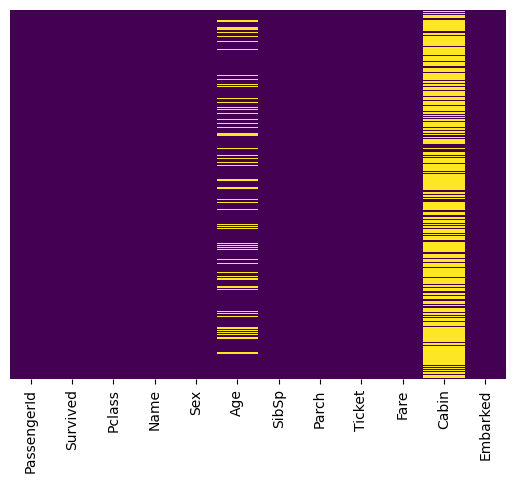

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

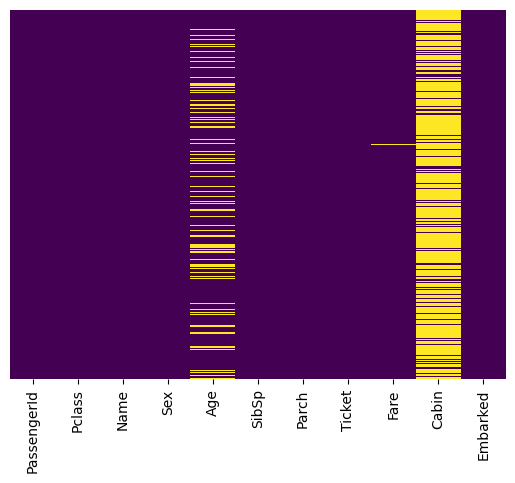

In [6]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

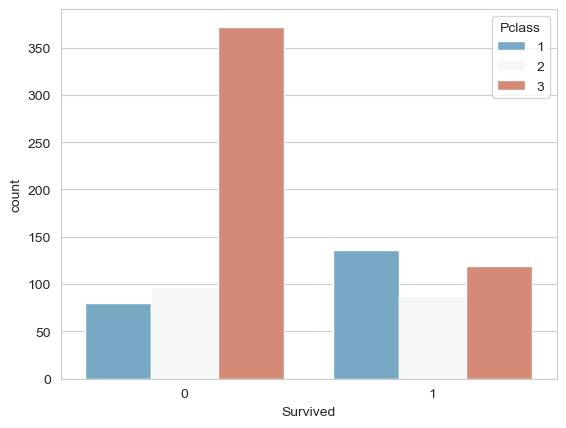

In [8]:
sns.countplot(x='Survived',data=train,hue='Pclass',palette='RdBu_r')

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


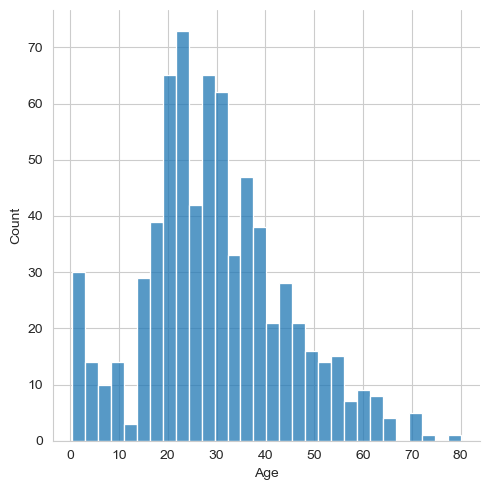

In [9]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<Axes: xlabel='SibSp', ylabel='count'>

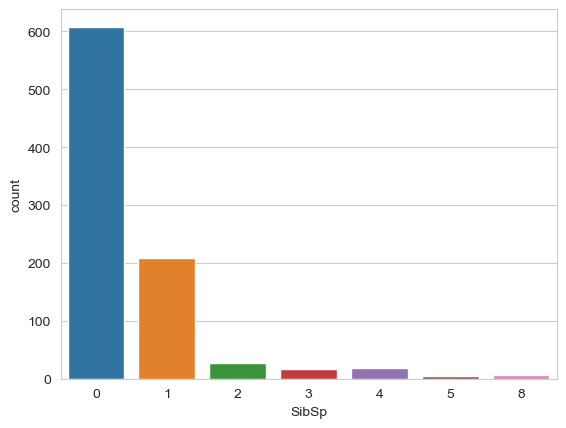

In [12]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Fare', ylabel='Count'>

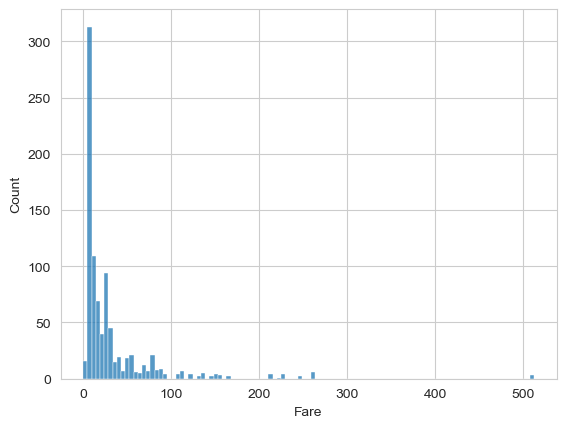

In [13]:
sns.histplot(data=train,x='Fare')

In [14]:
import cufflinks as cf

In [15]:
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [16]:
#train['Fare'].iplot(kind='hist',bins=30)
#pd.options.plotting.backend = "plotly"
#fig = train.plot()
#fig.show()

<Axes: xlabel='Pclass', ylabel='Age'>

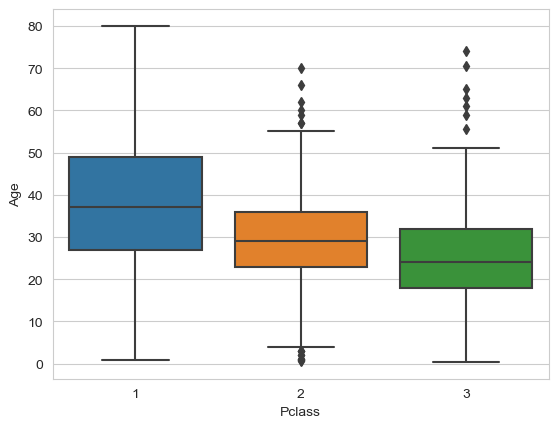

In [17]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [18]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
train['Age']=train[['Age','Pclass']].apply(input_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(input_age,axis=1)

In [20]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

<Axes: >

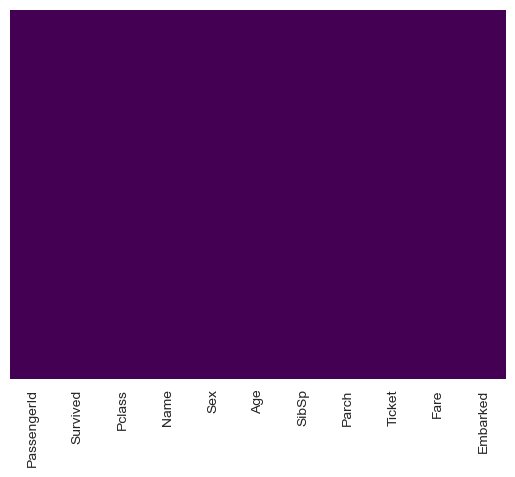

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
test.fillna(method='ffill',axis=0,inplace=True)

<Axes: >

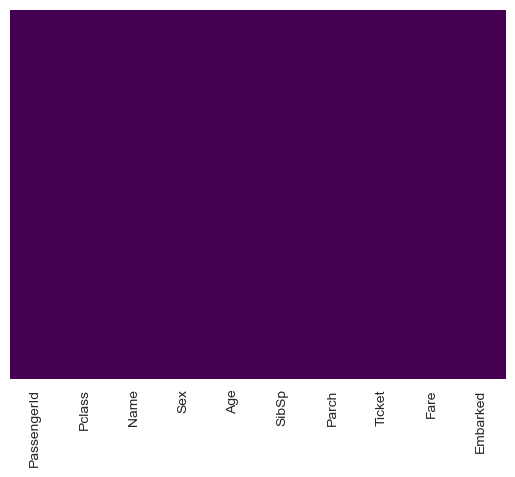

In [23]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Model creation

In [24]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [25]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [26]:
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [27]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [28]:
train=pd.concat([train,sex,embark],axis=1)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,24.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [29]:
sex=pd.get_dummies(test['Sex'],drop_first=True)

embark=pd.get_dummies(test['Embarked'],drop_first=True)

test.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

test=pd.concat([test,sex,embark],axis=1)

test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,True,False,True
414,1,39.0,0,0,108.9000,False,False,False
415,3,38.5,0,0,7.2500,True,False,True
416,3,24.0,0,0,8.0500,True,False,True


In [30]:
test.head(3)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False


In [31]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.82737724, -0.53383369,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.67489052,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.23165264, -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [ 0.82737724, -0.38274316,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.23165264, -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.22161894, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971]])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [37]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [38]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [39]:
predictions=logmodel.predict(X_test)

# Model evaluation

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       176
           1       0.81      0.74      0.77        92

    accuracy                           0.85       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.85      0.85      0.85       268



In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test,predictions)

array([[160,  16],
       [ 24,  68]])

In [44]:
scaler = StandardScaler()
test = scaler.fit_transform(test)
test

array([[ 0.87348191,  0.40176758, -0.49947002, ...,  0.75592895,
         2.84375747, -1.35067551],
       [ 0.87348191,  1.3716154 ,  0.61699237, ..., -1.32287566,
        -0.35164743,  0.74037028],
       [-0.31581919,  2.53543279, -0.49947002, ...,  0.75592895,
         2.84375747, -1.35067551],
       ...,
       [ 0.87348191,  0.71211888, -0.49947002, ...,  0.75592895,
        -0.35164743,  0.74037028],
       [ 0.87348191, -0.41290459, -0.49947002, ...,  0.75592895,
        -0.35164743,  0.74037028],
       [ 0.87348191, -0.41290459,  0.61699237, ...,  0.75592895,
        -0.35164743, -1.35067551]])

# Model testing

In [45]:
# using the test data(unseen data) on the model to predict survival or not

In [46]:
predictions=logmodel.predict(test)

In [47]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [48]:
predictions=pd.DataFrame(predictions,columns=['Status'])
predictions

,Status
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [49]:
def prediction(pred):
    if pred==1:
        return 'Survived'
    else:
        return 'Not Survived'

In [53]:
predictions['Status']=predictions['Status'].apply(prediction)

In [54]:
predictions

,Status
0,Not Survived
1,Not Survived
2,Not Survived
3,Not Survived
4,Survived
...,...
413,Not Survived
414,Survived
415,Not Survived
416,Not Survived


In [56]:
predictions['Status'].value_counts()

Status
Not Survived    268
Survived        150
Name: count, dtype: int64